In [2]:
%%HTML

<style>
td {
  font-size: 12px
}
th{
  font-size: 12px  
}
</style>

# Spatial Data Manipulation: Raster

## Overview

### Packages 
There are various packages supporting raster data manipulation. In our example, we take advantage of `rasterio`, `numpy` and `earthpy`. The following is the introduction of each Python package. 

* <a href=https://rasterio.readthedocs.io/en/latest/index.html>`rasterio`</a> reads and writes gridded raster datasets such as satellite imagery and terrain models with formats (e.g., GeoTIFF; *.tiff) and provides a Python API based on Numpy N-dimensional arrays and GeoJSON.
* <a href=https://numpy.org/>`numpy`</a> provides numerous functionalities for scientific purposes. Among them, we utilize this package to calculate grid datasets once they were imported with `rasterio`, given that grid dataset has rows and columns to represent geographical phenomena. 
* <a href=https://earthpy.readthedocs.io/en/latest/>`earthpy`</a> is a python package that makes it easier to plot and work with spatial raster and vector data using open source tools. It depends upon `geopandas` which has a focus on vector data and `rasterio` with facilitates input and output of raster data files. It also requires `matplotlib` for plotting operations. 

### Dataset
In this lecture, we use Landsat 8 imagery, which was downloaded from <a href=https://earthexplorer.usgs.gov/>Earth Explorer</a>. The instructor acquired two major datasets, which were taken on ***June 22, 2021 (representing summer)*** and ***January 16, 2022 (representing winter)***. Given the size of the original dataset (~1GB), two datasets were clipped with the boundary of Champaign County and we only use ***4 bands (i.e., Near-infrared (NIR), Red, Green, and Blue)*** out of 11 bands of Landsat 8, which are below.

<h3><center>Landsat-8 Operational Land Imager & Thermal Infrared Sensor</center></h3>

| Band Number |	Description | Wavelength |	Resolution |
| :-: | :-: | :-: | :-: |
|Band 1	|Coastal / Aerosol |	0.433 to 0.453 µm |	30 meter |
| **Band 2**	| **Visible blue** |	**0.450 to 0.515 µm** |	**30 meter**|
|**Band 3**	|**Visible green** |	**0.525 to 0.600 µm** |	**30 meter**|
|**Band 4**	|**Visible red** |	**0.630 to 0.680 µm** |	**30 meter** |
|**Band 5**	|**Near-infrared** |	**0.845 to 0.885 µm** |	**30 meter** |
|Band 6	|Short wavelength infrared |	1.56 to 1.66 µm |	30 meter |
|Band 7	|Short wavelength infrared |	2.10 to 2.30 µm |	60 meter |
|Band 8	|Panchromatic |	0.50 to 0.68 µm |	15 meter |
|Band 9	|Cirrus |	1.36 to 1.39 µm |	30 meter |
|Band 10 | Long wavelength infrared |	10.3 to 11.3 µm	| 100 meter |
|Band 11 |	Long wavelength infrared |	11.5 to 12.5 µm	 |100 meter |

### Tasks
1. Examine a single band of Landsat 8 imagery
2. Comebine three bands (RGB) to represent TRUE color of the sattelite imagery
3. Comebine three bands (NIR, R, G) to represent FALSE color of the sattelite imagery
4. Calculate Normalized Difference Vegetation Index (NDVI) with NIR band and R band.
5. Classify regions with the NDVI.

In [3]:
# Import necessary packages
import rasterio as rio
import numpy as np
import os
import matplotlib.pyplot as plt
import earthpy.plot as ep

In [4]:
# Define relative paths for dataset
summer_path = './data/landsat8_summer' # Stores Landsat 8 imagery was taken June 22, 2021
winter_path = './data/landsat8_winter' # Stores Landsat 8 imagery was taken January 16, 2022

## 1. Import Raster Dataset with `rasterio`

Here, we are importing the Blue band of Landsat 8 summer imagery (LC08_L1TP_023032_20210622_20210629_02_T1_B2.TIF), to see how the raster data is imported and presented in Python. 

One more thing, `os` module is an embedded module in Python, and it provides a portable way of using operating system dependent functionality. For example, we can easily set the file path and call it later with `os.path.join` function. 

In [5]:
print(f'Summer Data path: {summer_path}')

# You can append the path to the stirng (summer_path) with os.path.join method
file_path = os.path.join(summer_path, f'LC08_L1TP_023032_20210622_20210629_02_T1_B2.TIF')
print(f'Joined Path: {file_path}')

Summer Data path: ./data/landsat8_summer
Joined Path: ./data/landsat8_summer/LC08_L1TP_023032_20210622_20210629_02_T1_B2.TIF


In [6]:
# Open a dataset for reading or writing with rasterio(rio).
# Default permission mode is read(r)
b_band_data = rio.open(file_path) 
print(type(b_band_data))
b_band_data

<class 'rasterio.io.DatasetReader'>


<open DatasetReader name='./data/landsat8_summer/LC08_L1TP_023032_20210622_20210629_02_T1_B2.TIF' mode='r'>

In [7]:
# You need to use method, read(), to read a dataset’s raw pixels as an numpy N-d array
b_band = b_band_data.read(1)
print(type(b_band)) # Its type is NumPy ndarray (N-dimensional array)
print(b_band.shape) # (M, N): M Rows and N Columns
b_band

<class 'numpy.ndarray'>
(1940, 1533)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)

Let's display a single band with plt.imshow() method. 

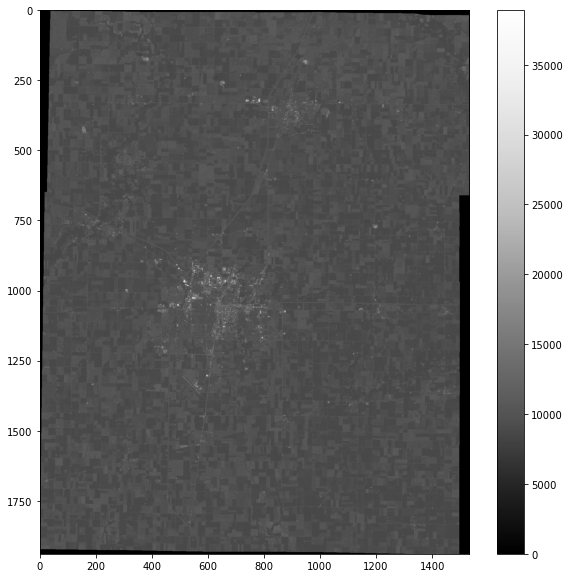

In [8]:
plt.figure(figsize = (10,10))  # Set the size of figure
plt.imshow(b_band, cmap='Greys_r')  # Display data as an image
plt.colorbar() # Create legend 
plt.show() # Display the map and legend

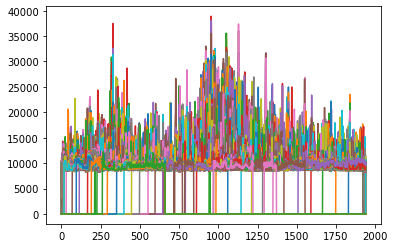

In [9]:
# You want to use imshow() method to display an image. The below is to describe an accident if you use plot() method. 
plt.plot(b_band)
plt.show()

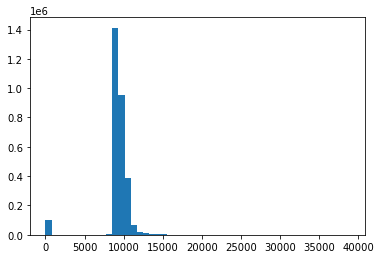

In [10]:
# Check the histogram of the imported image
plt.hist(b_band.flatten(), bins=50)
plt.show()

---
### *Exercise*
1. Import Blue band of Winter Landsat 8 imagery (filename: `LC08_L1TP_023032_20220116_20220123_02_T1_B2.TIF`) which located in `landsat8_winter` folder, and save it as `b_band_winter`.
2. Display the imported image with `plt.imshow()` method. (**Note**: `plt` is `matplotlib` package. We will cover this on Week 6)
---

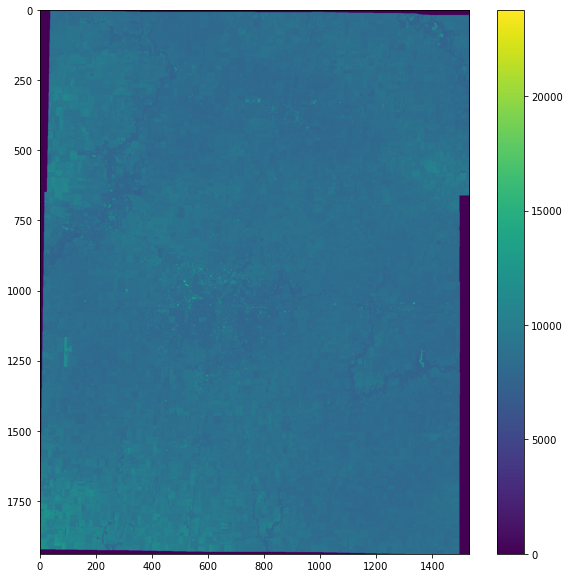

In [11]:
# Your code here
## Step 1
path_ = os.path.join(winter_path, 'LC08_L1TP_023032_20220116_20220123_02_T1_B2.TIF') # Path to the image file
b_winter_data = rio.open(path_) # Open the file with rasterio
b_band_winter = b_winter_data.read(1) # Read it and convert it to numpy array

## Step 2
plt.figure(figsize=(10, 10)) # (Optional) Define the size of figure
plt.imshow(b_band_winter) # Display the image
plt.colorbar() # (Optinal) # Display the colorbar legend
plt.show() 

## 2. Creating a color image

In the previous example, we rely on a band, so that it cannot be a color image. To display a color image here, we are importing four bands (i.e., Near-infrared (NIR), Red, Green, and Blue), and storing them into ONE NumPy array.

* Blue band: LC08_L1TP_023032_20210622_20210629_02_T1_B2.TIF
* Green band: LC08_L1TP_023032_20210622_20210629_02_T1_B3.TIF
* Red band: LC08_L1TP_023032_20210622_20210629_02_T1_B4.TIF
* NIR band: LC08_L1TP_023032_20210622_20210629_02_T1_B5.TIF

In [12]:
l_summer = [] # Empty list for storing Numpy array

for i in [2, 3, 4, 5]: # Blue, Green, Red, Near-infrared
    temp_path = os.path.join(summer_path, f'LC08_L1TP_023032_20210622_20210629_02_T1_B{i}.TIF') # Image path
    temp_band = rio.open(temp_path) # Import image into rasterio package
    l_summer.append(temp_band.read(1)) # Convert image to Numpy array and append it to the empty list

# What you are seeing, as a result, is a list that has four NumPy arrays. 
print(l_summer)

[array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint16)]


In [13]:
# Now we convert the list to 3D array.
arr_summer = np.stack(l_summer) # np.stack() stacks the list; convert the list that has four 2D arrays to one 3D array.
print(arr_summer.shape)  # Check the shape (Bands, Rows, Columns)
print(type(arr_summer))
print(arr_summer)

(4, 1940, 1533)
<class 'numpy.ndarray'>
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [14]:
# Check the sliced numpy is equal to the Blue band
np.array_equal(arr_summer[0, :, :], b_band)

True

Now, let's plot the four bands INDIVIDUALLY to check if they are imported properly. <br>
Check <a href=https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.plot_bands>`ep.plot_bands()`</a> for more information. 

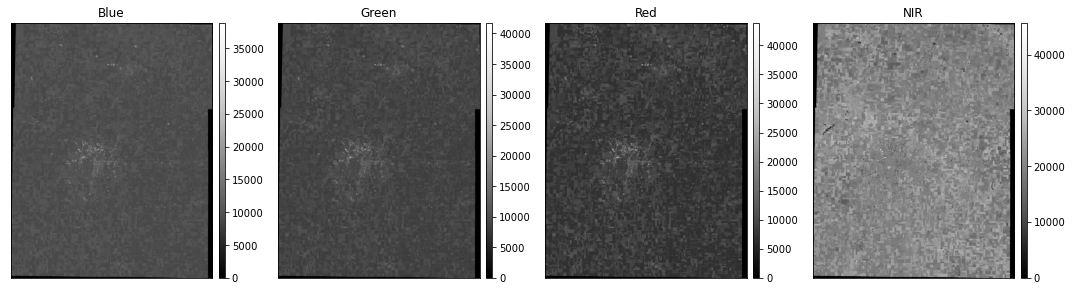

In [15]:
ep.plot_bands(arr_summer, # Numpy array to be displayed.
              figsize= (15, 5), # Figure size
              title=["Blue", "Green", "Red", "NIR"], # Specify the name of each band (just for reference purpose)
              cmap = 'Greys_r', # Define color map for displaying image
             cols=4)  # Number of columns when displayed
plt.show()

You can also check the histogram of each bands with <a href=https://earthpy.readthedocs.io/en/latest/api/earthpy.plot.html#earthpy.plot.hist>`ep.hist()`</a> method. 

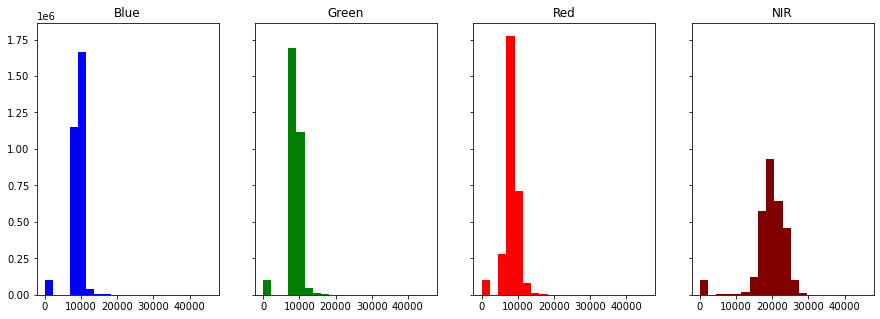

In [16]:
ep.hist(arr_summer, 
        figsize=(15,5), 
        colors=["Blue", "Green", "Red", "Maroon"], 
        title=["Blue", "Green", "Red", "NIR"], 
        cols=4
       )
plt.show()

Given that we have more than three bands (we have four bands in `arr_summer`), we now can assign them to RGB, respectively. In the domain of Remote Sensing, there are two well-known appraoches to display the color image. 

<h3><center> True and False Color representation of Satellite image </center></h3>

| Method | Red Color | Green Color | Blue Color | Purpose |
| :-: | :-: | :-: | :-: | :-: |
| True Color | Red Band | Green Band | Blue Band | True color image |
| False Color | NIR Band | Red Band | Green Band | Monitoring Vegitation |

![True and False Color representation of Satellite image](./data/True_False_Color.png)

Source: Garrard, Chris. (2016). *Geoprocessing with Python*. Manning. p.176

We take advantage of <a href=https://earthpy.readthedocs.io/en/latest/_modules/earthpy/plot.html#plot_rgb>`ep.plot_rgb()`</a> method to display a color image. 

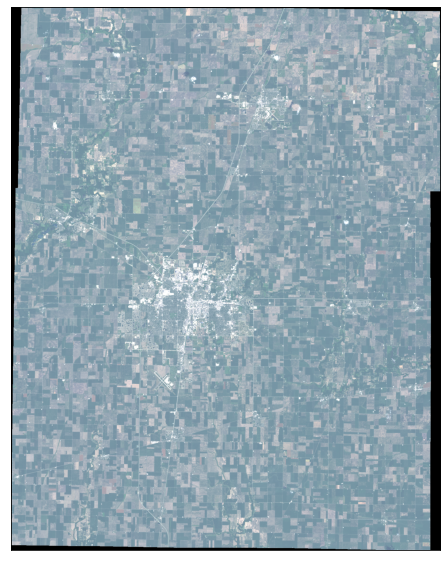

In [17]:
# TRUE COLOR: Plot three bands in a numpy array as a composite RGB image.
ep.plot_rgb(arr_summer, 
            rgb=(2,1,0), # Indices of the three bands to be plotted.
            str_clip=0.5, # (Optional) The percentage of clip to apply to the stretch.
            figsize =(10,10), # The x and y integer dimensions of the output plot.
            stretch=True # (Optional) If set to True, a linear stretch will be applied.
           )
plt.show()

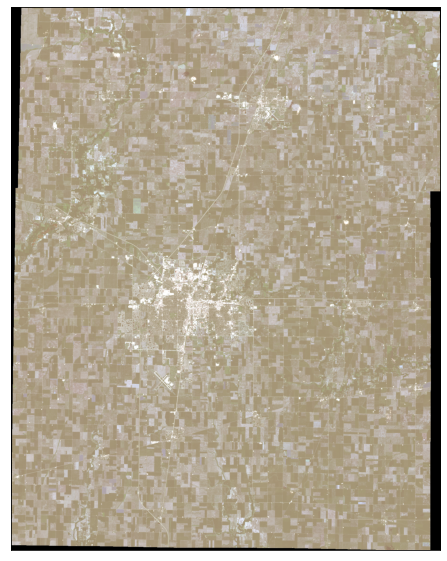

In [18]:
# If the indices are not properly assigned. 
ep.plot_rgb(arr_summer,
#             rgb=(2,1,0), # Indices of the three bands to be plotted; Default value is (0, 1, 2).
            str_clip=0.5, # (Optional) The percentage of clip to apply to the stretch.
            figsize =(10,10), # The x and y integer dimensions of the output plot.
            stretch=True # (Optional) If set to True, a linear stretch will be applied.
           )
plt.show()

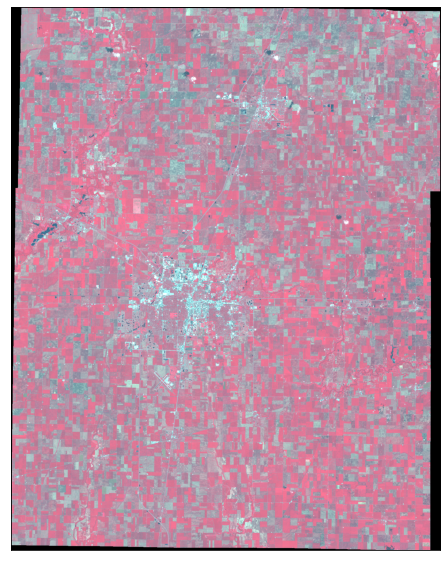

In [19]:
# FALSE Color: Plot three bands in a numpy array as a composite RGB image.
ep.plot_rgb(arr_summer, 
            rgb=(3,2,1), # NIR band -> Red color, Red band -> Green color, Green band -> Blue color
            str_clip=0.5, # The percentage of clip to apply to the stretch.
            figsize =(10,10), # The x and y integer dimensions of the output plot.
            stretch=True # If set to True, a linear stretch will be applied.
           )
plt.show()

---
### *Exercise*
1. Import FOUR BANDS of Winter Landsat 8 imagery (filename: `LC08_L1TP_023032_20220116_20220123_02_T1_B{band_num}.TIF`) which located in `landsat8_winter` folder, and save it as `arr_winter`.
2. Display TRUE color of the winter imagery with `ep.plot_rgb()` method.
3. Display FALSE color of the winter imagery with `ep.plot_rgb()` method.
---

In [20]:
# Your code here (Task 1)
# Compare the False color of winter
l_winter = []
for i in [2,3,4,5]: # Blue, Green, Red, Near-infrared
    temp_band = rio.open(os.path.join(winter_path, f'LC08_L1TP_023032_20220116_20220123_02_T1_B{i}.TIF'))
    l_winter.append(temp_band.read(1))

arr_winter = np.stack(l_winter)
arr_winter

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint16)

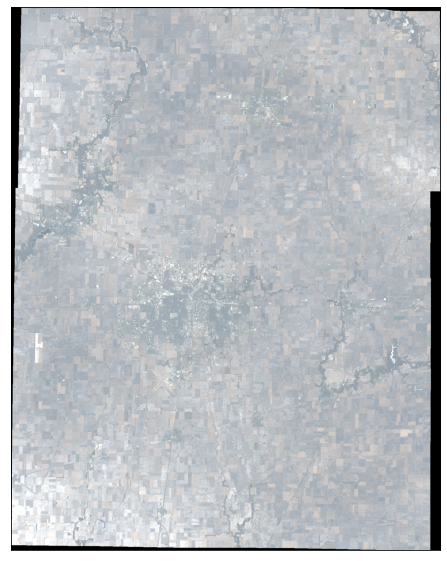

In [21]:
# Your code here (Task 2)
ep.plot_rgb(arr_winter, rgb=(2,1,0), str_clip=0.5,  figsize =(10,10), stretch=True)
plt.show()

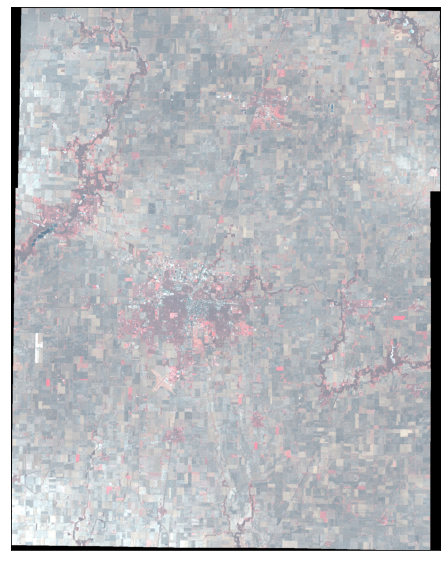

In [22]:
# Your code here (Task 3)
ep.plot_rgb(arr_winter, rgb=(3,2,1), str_clip=0.5,  figsize =(10,10), stretch=True)
plt.show()

## 3. Map Algebra with NumPy

Sometimes, it is challenging to quantify the temporal changes of vegetation with bare eyes. To overcome the issue, we often utilize NDVI (Normalized Difference Vegetation Index). The index quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs).

\begin{gather*}
NDVI = \frac{NIR - RED}{NIR + RED}
\end{gather*}

In [23]:
# Extract Red and NIR band from the stacked array
r_band_summer = arr_summer[2] 
nir_band_summer = arr_summer[3]

In [24]:
# To match the histrogram of two images, we normalize each image with the following function. 
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    '''
    normalize: normalize a numpy array so all value are between 0 and 1
    '''
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

print(f"Red Band Min/Max (BEFORE normalization): {r_band_summer.min()}, {r_band_summer.max()}")
print(f"NIR Band Min/Max (BEFORE normalization): {nir_band_summer.min()}, {nir_band_summer.max()}")

r_band_norm = normalize(r_band_summer)
nir_band_norm = normalize(nir_band_summer)

print(f"Red Band Min/Max (AFTER normalization): {r_band_norm.min()}, {r_band_norm.max()}")
print(f"NIR Band Min/Max (AFTER normalization): {nir_band_norm.min()}, {nir_band_norm.max()}")

Red Band Min/Max (BEFORE normalization): 0, 43896
NIR Band Min/Max (BEFORE normalization): 0, 45703
Red Band Min/Max (AFTER normalization): 0.0, 1.0
NIR Band Min/Max (AFTER normalization): 0.0, 1.0


Given that the sizes of two arrays are the same, we can simply do numerical operations as shown below. 

In [25]:
ndvi = (nir_band_norm - r_band_norm) / (nir_band_norm + r_band_norm)
ndvi

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_75509/2587444290.py:1: RuntimeWarning: invalid value encountered in true_divide
  ndvi = (nir_band_norm - r_band_norm) / (nir_band_norm + r_band_norm)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

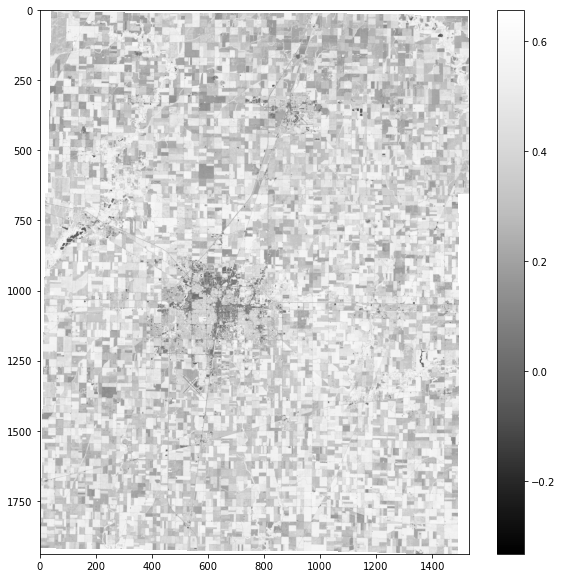

In [26]:
# Plotting NDVI result. 
plt.figure(figsize=(10, 10)) # (Optional) Define the size of figure
plt.imshow(ndvi, cmap='Greys_r') # Display the image
plt.colorbar() # (Optinal) # Display the colorbar legend
plt.show() 

## 4. Classify Raster Image based on the NDVI

Given that NDVI is an index (ranged -1 ~ +1), it helps us to determine the degree of vegetation of each cell. Here, we use NDVI to classify the image and check the area covered by vegetation. 

| NDVI Range | Meaning |
| :-: | :-: |
| ~ 0.1 | Barren rock, sand, or snow |
| 0.2 ~ 0.5 | Sparse vegetation (e.g., shrub, grassland) |
| 0.6 ~ | Dense vegetation (e.g., forest) |

Source: https://www.usgs.gov/special-topics/remote-sensing-phenology/science/ndvi-foundation-remote-sensing-phenology


With <a href=https://numpy.org/doc/stable/reference/generated/numpy.digitize.html>`np.digitize()`</a> function, we can classify the image with a given range (e.g., `bins` below)

In [27]:
ndvi

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [28]:
ndvi = np.nan_to_num(ndvi, nan=-1)
ndvi

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [29]:
# -1 ~ 0.15: Low Vegetation
# 0.15 ~ 0.5 : Moderate Vegetation
# 0.5 ~ 1: High Vegetation

bounds = np.array([-1, 0.15, 0.5, 1])
ndvi_class = np.digitize(ndvi, bounds)
print(f'Classes in the NDVI image: {np.unique(ndvi_class)}')

Classes in the NDVI image: [1 2 3]


If you plot the result of `np.digitize()` directly, it doesn't mean anything. `np.digitize()` returns the index of the range that the value falls into. 

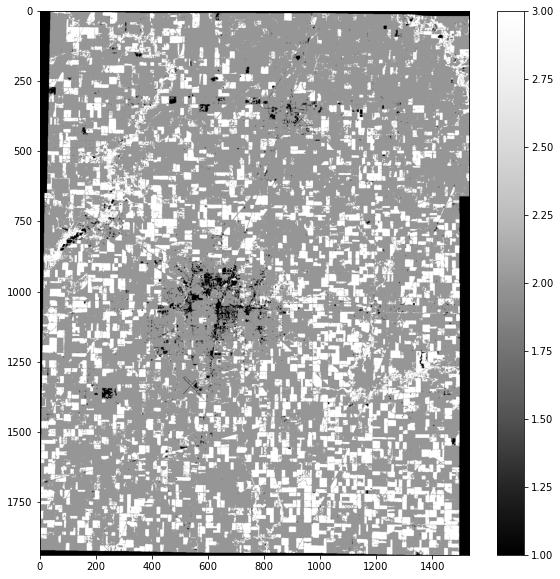

In [30]:
plt.figure(figsize=(10, 10)) # (Optional) Define the size of figure
plt.imshow(ndvi_class, cmap='Greys_r') # Display the image
plt.colorbar() # (Optinal) # Display the colorbar legend
plt.show() 

You can specify colors per class with `matplotlib.colors.ListedColormap`. 

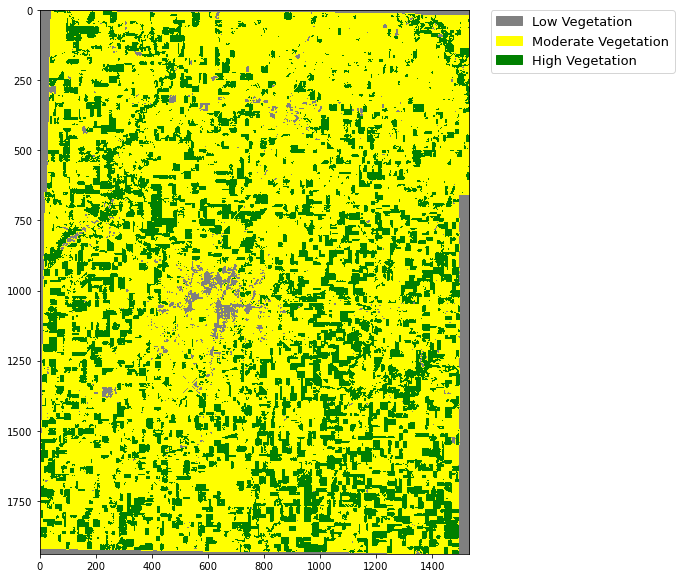

In [31]:
# Define color map
from matplotlib.colors import ListedColormap
ndvi_colors = ["grey", "yellow", "green"]
ndvi_cmap = ListedColormap(ndvi_colors)

# Define class names
ndvi_names = [
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

fig, ax = plt.subplots(figsize=(10, 10))
ndvi_ax = ax.imshow(ndvi_class, cmap=ndvi_cmap)
ep.draw_legend(im_ax=ndvi_ax, classes=np.unique(ndvi_class), titles=ndvi_names)
plt.show()

---
### *Exercise*
Bring `arr_winter` array from the previous exercise and calculate NDVI for winter. If you couldn't finish the previous exercise, you can copy and past the following code to acquire the same array.
```python
l_winter = []
for i in [2,3,4,5]: # Blue, Green, Red, Near-infrared
    temp_band = rio.open(os.path.join(winter_path, f'LC08_L1TP_023032_20220116_20220123_02_T1_B{i}.TIF'))
    l_winter.append(temp_band.read(1))

arr_winter = np.stack(l_winter)
```

1. Create two arrays (`r_band_winter` and `nir_band_winter`) by slicing `arr_winter`. R band and NIR band have indices of 2 and 3 in `arr_winter`, respectively. 
2. Use the funtion `calculate_NDVI` defined in the cell below to calculate NDVI result of the winter, and save it as `ndvi_winter`. 
3. Replace `nan` value with -1 by using `np.nan_to_num()` function, and save the result back to `ndvi_winter`.
---

In [32]:
l_winter = []
for i in [2,3,4,5]: # Blue, Green, Red, Near-infrared
    temp_band = rio.open(os.path.join(winter_path, f'LC08_L1TP_023032_20220116_20220123_02_T1_B{i}.TIF'))
    l_winter.append(temp_band.read(1))

arr_winter = np.stack(l_winter)

In [33]:
def calculate_NDVI(r_band, nir_band):
    
    r_band_ = normalize(r_band)
    nir_band_ = normalize(nir_band)
    
    ndvi_result = (nir_band_ - r_band_) / (nir_band_ + r_band_)
    
    return ndvi_result

In [34]:
# Your code here
## Task 1
r_band_winter = arr_winter[2]
nir_band_winter = arr_winter[3]

## Task 2
ndvi_winter = calculate_NDVI(r_band_winter, nir_band_winter)

## Task 3
ndvi_winter = np.nan_to_num(ndvi_winter, nan=-1)

ndvi_winter

/var/folders/gg/_6n87y3x2tq2hkxm05d_ypp80000gn/T/ipykernel_75509/3960286366.py:6: RuntimeWarning: invalid value encountered in true_divide
  ndvi_result = (nir_band_ - r_band_) / (nir_band_ + r_band_)


array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

Check the NDVI result in the cell below. 

In [35]:
bounds = np.array([-1, 0.15, 0.5, 1])
ndvi_class_winter = np.digitize(ndvi_winter, bounds)
print(f'Classes in the NDVI image: {np.unique(ndvi_class_winter)}')

Classes in the NDVI image: [1 2]


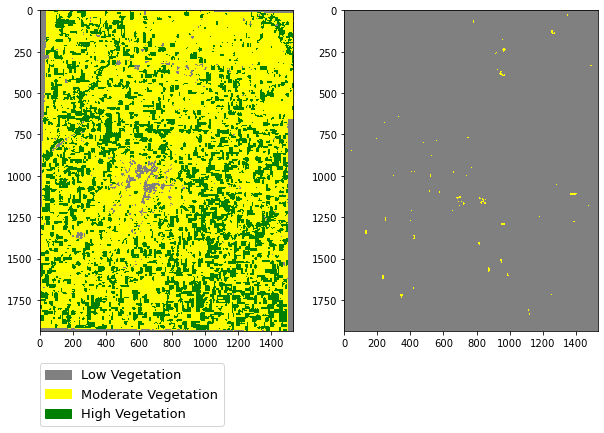

In [36]:
# Define color map
from matplotlib.colors import ListedColormap
ndvi_colors_winter = ["grey", "yellow"]
ndvi_cmap_winter = ListedColormap(ndvi_colors_winter)

# Plotting both Summer and Winter NDVI results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ndvi_ax = ax1.imshow(ndvi_class, cmap=ndvi_cmap)  # Summer NDVI
ndvi_ax_winter = ax2.imshow(ndvi_class_winter, cmap=ndvi_cmap_winter) # Winter NDVI
ep.draw_legend(im_ax=ndvi_ax, bbox=(0, -0.1), classes=np.unique(ndvi_class), titles=ndvi_names)
plt.show()

Let's calculate the area covered by vegetation and its percentage, for both summer and winter.

In [37]:
# This will give you the number of columns and rows of the entire area
print(arr_summer.shape) # (Bands, Rows, Columns)

# By multiplying rows and columns, we can get the total number of grids. 
total_grid = arr_summer.shape[1] * arr_summer.shape[2]
print(total_grid)

(4, 1940, 1533)
2974020


In [38]:
# The code returns True or False by determining whether each value meets the criteria
print(np.unique(ndvi_class))
count_vegetation = ndvi_class > 1 # NDVI class is either 2 or 3
count_vegetation

[1 2 3]


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [39]:
# .sum() method only counts the True values, therefore, we can check how many cells satisfy the criteria above.
vegetation_summer = count_vegetation.sum() 
print(f"The number of cells covered by vegetation: {vegetation_summer}")
print(f"The percentage covered by vegetation: {round(vegetation_summer/total_grid, 2)}%")

The number of cells covered by vegetation: 2830678
The percentage covered by vegetation: 0.95%


In [40]:
# You can also take advantage of this appraoch to calculate the area covered by vegetation
(vegetation_summer * 30 * 30) / (1000 * 1000)

2547.6102

## 5. Export Raster

We still reply on <a href=https://rasterio.readthedocs.io/en/latest/api/rasterio.html?#rasterio.open>`rasterio.open()`</a> function to write (export) raster file. However, note that we need to specify more attributes compared to when you load data. 

In [41]:
# This function initiates a writing process. 
## dtype, crs, transform are obtained from our original Blue band (b_band_data). 
new_dataset = rio.open('./data/ndvi_summer.tif', # The name of new Tiff file
                       mode='w', # ‘r’ (read, the default), ‘r+’ (read/write), ‘w’ (write), or ‘w+’ (write/read)
                       driver='GTiff', # Currently, it only supports GeoTiff
                       height = ndvi_class.shape[0], # The number of rows of the raster dataset
                       width = ndvi_class.shape[1], # The number of columns of the raster dataset
                       count=1, # The count of dataset bands
                       dtype=b_band_data.dtypes[0], #  The data type for bands
                       crs=b_band_data.crs, #  The coordinate reference system
                       transform=b_band_data.transform # Affine transformation mapping the pixel space to geographic space
                      )

ndvi_class=ndvi_class.astype(np.uint16)
new_dataset.write(ndvi_class, 1) # This is the function actually write the file. 
new_dataset.close()